In [1]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
# Load xdf data
data, header = pyxdf.load_xdf('C:/Users/seinj/Teaching/Recordings_2023_EDA/source-data/pb_01_base2.xdf')

In [6]:
# Explore xdf header 
print("XDF Header:")
print(header)

XDF Header:
{'info': defaultdict(<class 'list'>, {'version': ['1.0']})}


In [7]:
# Explore xdf data structure
print("\nXDF Data:")
display(data)


XDF Data:


[{'info': defaultdict(list,
              {'name': ['OpenSignals'],
               'type': ['84:BA:20:CE:56:D7'],
               'channel_count': ['2'],
               'nominal_srate': ['10'],
               'channel_format': ['float32'],
               'source_id': ['OpenSignals'],
               'version': ['1.1000000000000001'],
               'created_at': ['6112.0082124'],
               'uid': ['b27543f0-c261-4596-b3f2-f5395d94d122'],
               'session_id': ['default'],
               'hostname': ['BPN-C043'],
               'v4address': [None],
               'v4data_port': ['16572'],
               'v4service_port': ['16572'],
               'v6address': [None],
               'v6data_port': ['16572'],
               'v6service_port': ['16572'],
               'desc': [defaultdict(list,
                            {'manufacturer': ['OpenSignals'],
                             'channels': [defaultdict(list,
                                          {'channel': [defaultdict

In [34]:
# Examine which streams are in the xdf data
print("\nStream Names:")
for stream in data:
    stream_name = stream['info']['name'][0]
    print(stream_name)


Stream Names:
OpenSignals
PlankP3Events


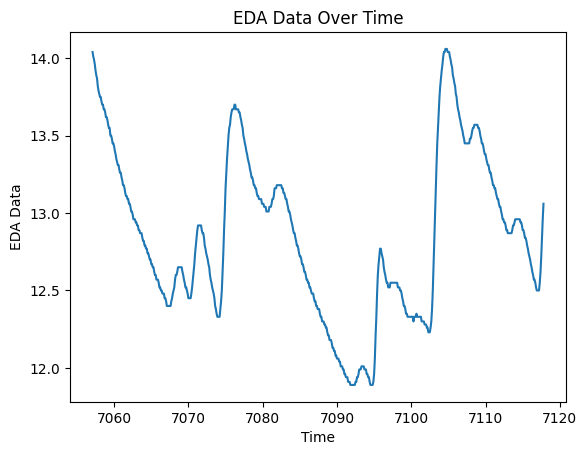

Numeric data (EDA) saved to: C:/Users/seinj/Teaching/Recordings_2023_EDA/csv-data/pb_01_base2.csv


In [8]:
# Check for numeric data before accessing
if 'time_series' in data[0] and 'time_stamps' in data[0]:
    eda = data[0]['time_series']
    times = data[0]['time_stamps']

    # Check the number of columns in the numeric data
    if eda.ndim > 1:
        # numeric data, draw as lines (adjust the column index if needed)
        plt.plot(times, eda[:, 1])
        plt.xlabel('Time')
        plt.ylabel('EDA Data')
        plt.title('EDA Data Over Time')
        plt.show()

        # Save numeric data to a CSV file
        output_file_folder = 'C:/Users/seinj/Teaching/Recordings_2023_EDA/csv-data'
        output_file_name = 'pb_01_base2.csv'
        output_file_path = output_file_folder + '/' + output_file_name
        os.makedirs(output_file_folder, exist_ok=True)
        np.savetxt(output_file_path, eda[:, 1], delimiter=',', header='EDA Data', comments='')
        print(f"Numeric data (EDA) saved to: {output_file_path}")
    else:
        print("The numeric data has only one column.")
else:
    print("The selected stream does not contain numeric data.")